## COMP-551 Applied ML

### Taught by Amy Zhang (amy.x.zhang@mail.mcgill.ca)


# http://pytorch.org/

## Why we need GPUs ?

* We do a lot of matrix multiplications !
* CPUs are fast and good for sequential tasks.
* GPUs are a bit slower but work really well for parallel tasks.
* GPUs have much smaller memory when compared to CPUs
* For training deep nets GPU with CUDA can lead to a 50 – 100 x boost.* 


\* <sub> (https://github.com/jcjohnson/cnn-benchmarks)



## Why Deep Learning Frameworks ?

* So you don’t have to deal with CUDA libraries.

* Build symbolic graphs of computation. ( No need to manually calculate and code the gradients for each parameter )

* Can take gradients of some scalar loss with weights/parameters.

* Applies the chain rule for you !!




## Popular Deep Learning Frameworks


* TensorFlow – from Google
* PyTorch – from Facebook, based on Torch by NYU
* Caffe2 – from Facebook, based on Caffe by Berkley
* Chainer – from Preferred Networks

All of the above are open source!


In [1]:
# Imports 
from __future__ import print_function
import pickle as pkl
import torch 
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

There are three major components to PyTorch:

## Tensors

* Its like a numpy ndarray 
* Doesn't know anything about deep learning or computational graphs or gradients
* **Also runs runs on GPU !**
* Can convert back and forth from the numpy array 


In [2]:
"""An uninitialized matrix is declared, but does not contain definite known values before it is used. 
When an uninitialized matrix is created, whatever values were in the allocated memory at the time 
will appear as the initial values."""
x = torch.empty(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [25]:
x = torch.Tensor(5, 3)
print(x)

tensor([[0.0000e+00, 2.5244e-29, 0.0000e+00],
        [2.5244e-29, 9.8091e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [26]:
print(x.size())

torch.Size([5, 3])


In [27]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.8193, 0.4492, 0.0642],
        [0.2733, 0.1092, 0.5139],
        [0.4286, 0.4194, 0.4817],
        [0.7451, 0.0744, 0.3890],
        [0.9533, 0.9520, 0.2448]])


In [3]:
# Construct a matrix filled with zeros and of dtype long:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [4]:
# Construct a tensor directly from data:

x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


### Operations

In [7]:
# Addition

y = torch.rand(5, 3)
print(x + y)

print(torch.add(x, y))

tensor([[ 1.2828, -0.5937,  0.8183],
        [-0.4512,  1.5072,  1.0238],
        [-0.3839,  0.4400,  1.0542],
        [-0.4371, -0.2432,  1.1229],
        [ 2.9639,  1.2503,  0.5499]])
tensor([[ 1.2828, -0.5937,  0.8183],
        [-0.4512,  1.5072,  1.0238],
        [-0.3839,  0.4400,  1.0542],
        [-0.4371, -0.2432,  1.1229],
        [ 2.9639,  1.2503,  0.5499]])


In [8]:
# Numpy-like indexing
print(x[:, 1])

tensor([-0.9655,  0.6647, -0.1786, -0.5127,  0.8722])


In [9]:
# Resizing a tensor
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [10]:
# If you have a one element tensor, use .item() to get the value as a Python number

x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.0390])
-0.03903389349579811


Supports most numpy operations like broadcasting, arithmetic, reshaping, indexing, etc.

### Converting from and back numpy

In [28]:
z = torch.LongTensor([[1, 3], [2, 9]])
print(z.type())
# Cast to numpy ndarray
print(z.numpy().dtype)

torch.LongTensor
int64


In [29]:
# Data type inferred from numpy
print(torch.from_numpy(np.random.rand(5, 3)).type())
print(torch.from_numpy(np.random.rand(5, 3).astype(np.float32)).type())

torch.DoubleTensor
torch.FloatTensor


## Moving things to GPU

In [30]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [31]:
# move tensor to GPU using
x = x.cuda()
print(x)


# move back to CPU
x = x.cpu()
print(x)

AssertionError: Torch not compiled with CUDA enabled

In [35]:
y = x + 2
print(y)
print(y.grad_fn) # y was created as a result of an operation, so it has a grad_fn.

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [36]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [38]:
out.backward()

In [39]:
# d(out)/dx

print(x.grad)


tensor([[9., 9.],
        [9., 9.]])


In [37]:
# .requires_grad_( ... ) changes an existing Tensor’s requires_grad flag in-place. The input flag defaults to False if not given.
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [40]:
# You can also stop autograd from tracking history on Tensors
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)


True
True
False
True
False
tensor(True)


In [ ]:
# Or by using .detach() to get a new Tensor with the same content but that does not require gradients:

print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

## Modules

* Differetiable objects; may store state or learnable weights
* Can define a new module; it inputs and outputs Tensors and corresponding input and output functions


### torch.nn

Neural networks can be constructed using the **torch.nn** package. Provides pretty much all neural network related functionalities for this course such as :

* Linear layers - nn.Linear, nn.Bilinear
* Convolution Layers - nn.Conv1d, nn.Conv2d, nn.Conv3d, nn.ConvTranspose2d
* Nonlinearities - nn.Sigmoid, nn.Tanh, nn.ReLU, nn.LeakyReLU
* Pooling Layers - nn.MaxPool1d, nn.AveragePool2d
* Recurrent Networks - nn.LSTM, nn.GRU
* Normalization - nn.BatchNorm2d
* Dropout - nn.Dropout, nn.Dropout2d
* Embedding - nn.Embedding
* Loss Functions - nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss


In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [46]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [50]:
"""Let’s try a random 32x32 input. Note: expected input size of this net (LeNet) is 32x32. 
To use this net on the MNIST dataset, please resize the images from the dataset to 32x32."""
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0455, -0.0723,  0.0729,  0.0659,  0.1561, -0.0942, -0.0261, -0.0650,
          0.1370,  0.0892]], grad_fn=<AddmmBackward>)


In [49]:
# Zero the gradient buffers of all parameters and backprops with random gradients:

net.zero_grad()
out.backward(torch.randn(1, 10))

### Construct our loss function and an Optimizer. 

The call to **model.parameters()** in the SGD constructor will contain the learnable parameters of the two nn.Linear modules which are part of the model.

In [51]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.0724, grad_fn=<MseLossBackward>)


In [52]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop

In [53]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0162, -0.0034, -0.0179,  0.0079,  0.0046, -0.0259])


### Updating the Weights

In [54]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)


In [55]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# Training a Classifier

We will do the following steps in order:

* Load and normalizing the CIFAR10 training and test datasets using torchvision
* Define a Convolutional Neural Network
* Define a loss function
* Train the network on the training data
* Test the network on the test data

In [56]:
import torch
import torchvision
import torchvision.transforms as transforms

In [57]:
# Loading and normalizing CIFAR10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


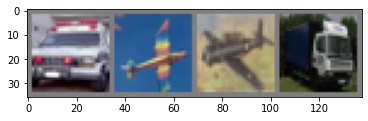

  car plane plane truck


In [58]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [60]:
# Define a convolutional neural network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [61]:
# Define a loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [62]:
# Train the network

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.204
[1,  4000] loss: 1.817
[1,  6000] loss: 1.651
[1,  8000] loss: 1.575
[1, 10000] loss: 1.518
[1, 12000] loss: 1.461
[2,  2000] loss: 1.391
[2,  4000] loss: 1.370
[2,  6000] loss: 1.344
[2,  8000] loss: 1.294
[2, 10000] loss: 1.302
[2, 12000] loss: 1.305
Finished Training


In [64]:
# Save our trained model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

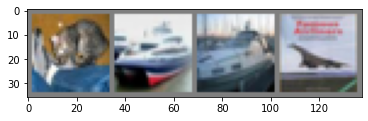

GroundTruth:    cat  ship  ship plane


In [65]:
# Test the network on test data

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [67]:
# Let's see how the network performs on the whole dataset

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [ ]:
# Analyze what classes performed well, and what classes did not perform well

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [66]:
# Training on GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
# Remember that you will have to send the inputs and targets at every step to the GPU too:

net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)


## References:

* MILA Pytorch tutorial ( https://github.com/mila-udem/welcome_tutorials/tree/master/pytorch )
* Justin Johnson's tutorial ( http://pytorch.org/tutorials/beginner/pytorch_with_examples.html )
* Official Pytorch tutorial ( https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html )